In [1]:
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
from sklearn.metrics.cluster import adjusted_rand_score
import STAGATE
# os.environ['R_HOME'] = 'D:/anaconda/envs/stagate/Lib/R'
# os.environ['R_USER'] = 'D:/anaconda/envs/stagate/Lib/site-packages/rpy2'


151507
------Calculating spatial graph...
The graph contains 24770 edges, 4226 cells.
5.8613 neighbors per cell on average.
Size of Input:  (4226, 3000)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [02:54<00:00,  2.87it/s]
R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.51
True
151508
------Calculating spatial graph...
The graph contains 25698 edges, 4384 cells.
5.8618 neighbors per cell on average.
Size of Input:  (4384, 3000)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [03:07<00:00,  2.67it/s]


fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.47
True
151509
------Calculating spatial graph...
The graph contains 28172 edges, 4789 cells.
5.8826 neighbors per cell on average.
Size of Input:  (4789, 3000)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [03:25<00:00,  2.43it/s]


fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.32
True
151510
------Calculating spatial graph...
The graph contains 27198 edges, 4634 cells.
5.8692 neighbors per cell on average.
Size of Input:  (4634, 3000)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [03:27<00:00,  2.40it/s]


fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.47
True
151669
------Calculating spatial graph...
The graph contains 21194 edges, 3661 cells.
5.7891 neighbors per cell on average.
Size of Input:  (3661, 3000)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [02:51<00:00,  2.91it/s]


fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.48
True
151670
------Calculating spatial graph...
The graph contains 20370 edges, 3498 cells.
5.8233 neighbors per cell on average.
Size of Input:  (3498, 3000)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [02:53<00:00,  2.88it/s]


fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.45
True
151671
------Calculating spatial graph...
The graph contains 24052 edges, 4110 cells.
5.8521 neighbors per cell on average.
Size of Input:  (4110, 3000)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [02:57<00:00,  2.82it/s]


fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.59
True
151672
------Calculating spatial graph...
The graph contains 23382 edges, 4015 cells.
5.8237 neighbors per cell on average.
Size of Input:  (4015, 3000)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [02:52<00:00,  2.89it/s]


fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.58
True
151673


KeyError: "None of ['cell8me'] are in the columns"

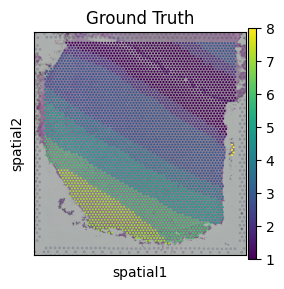

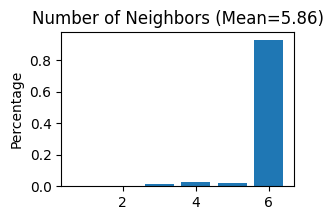

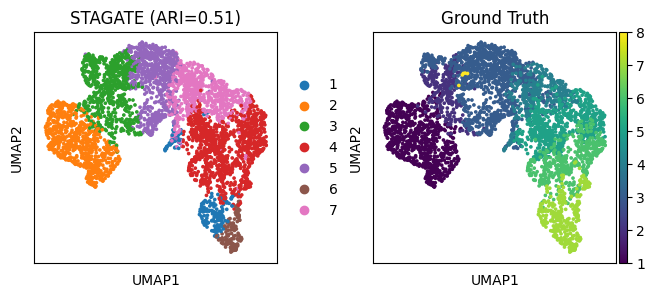

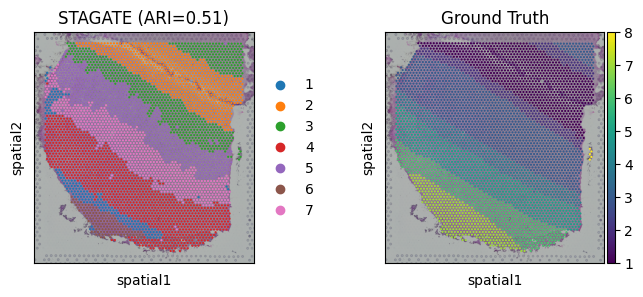

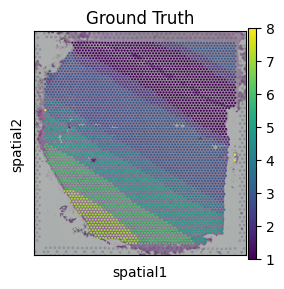

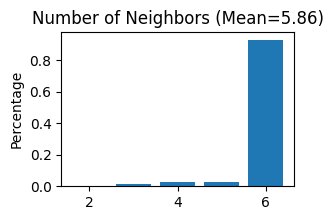

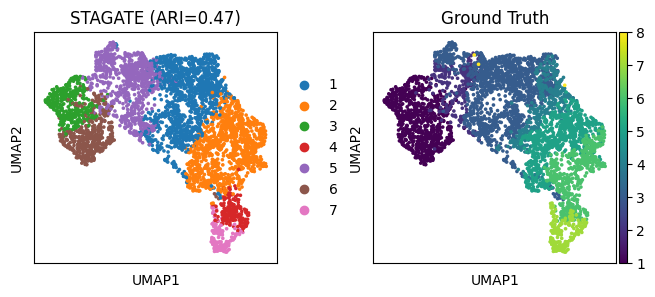

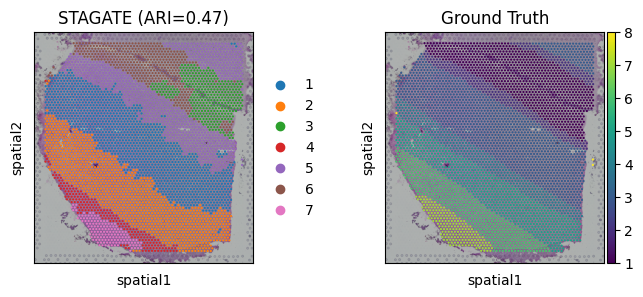

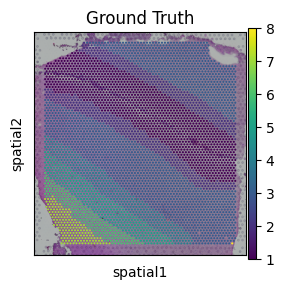

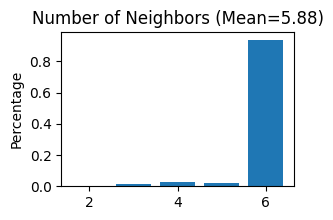

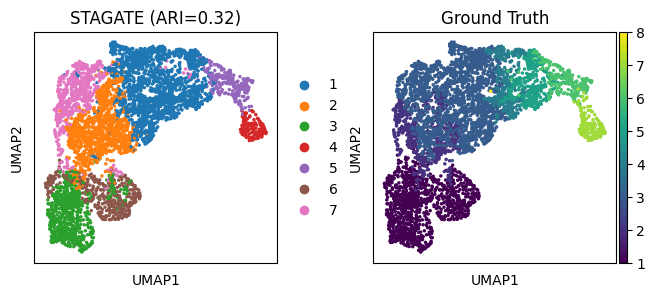

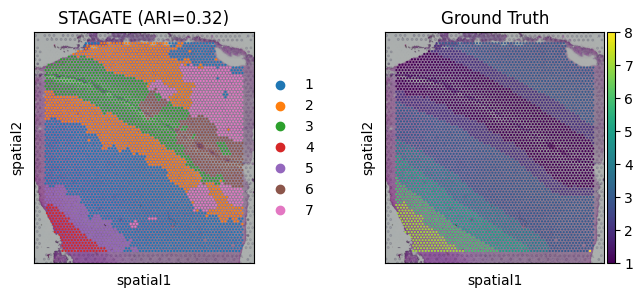

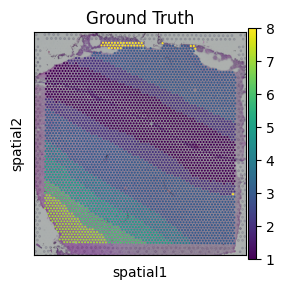

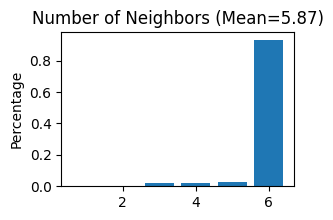

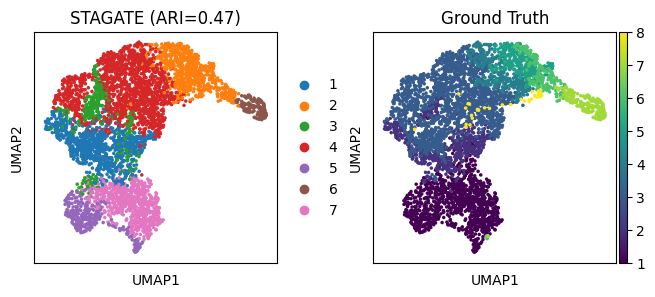

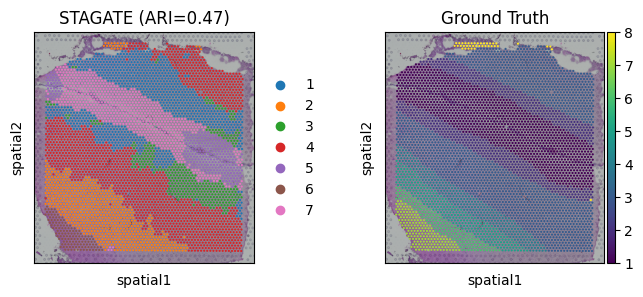

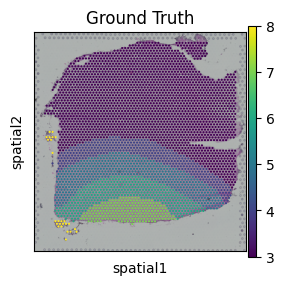

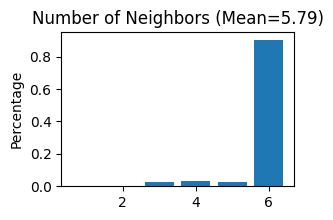

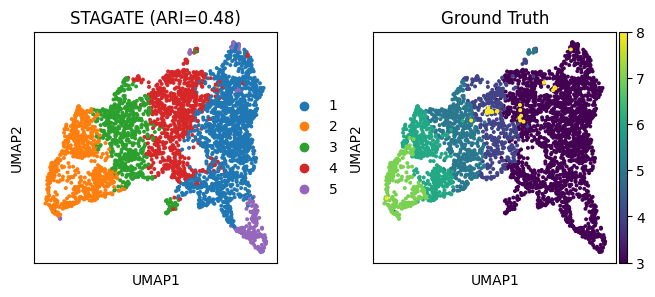

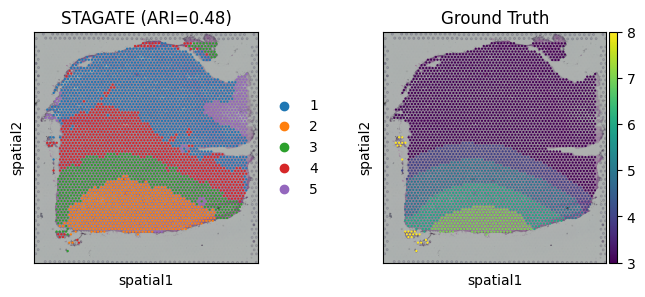

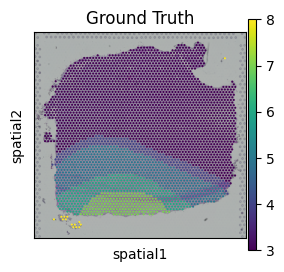

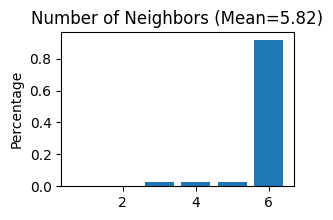

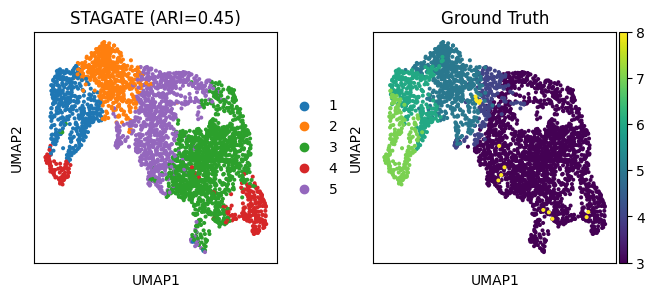

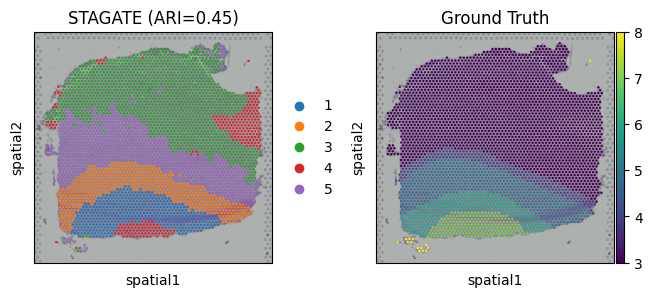

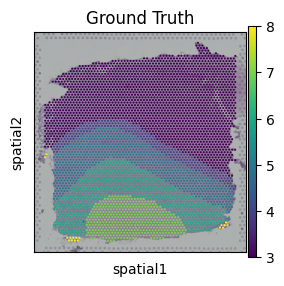

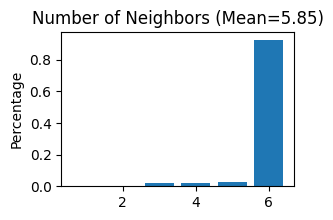

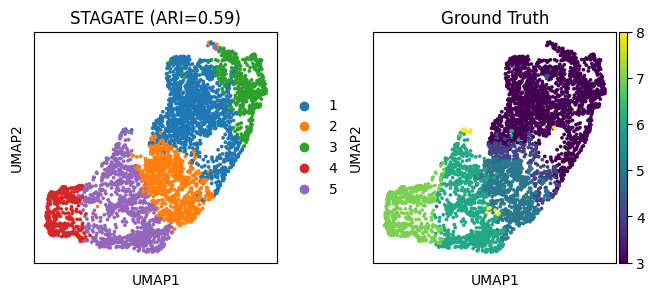

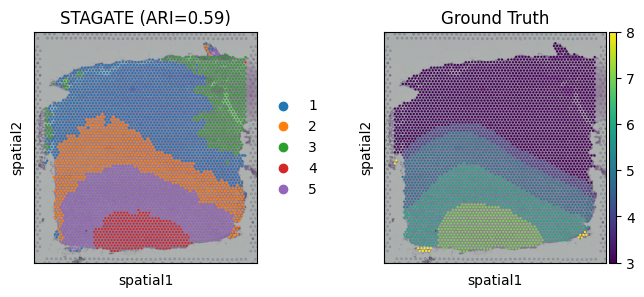

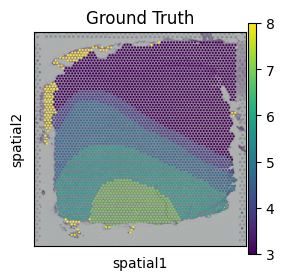

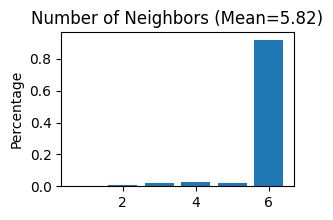

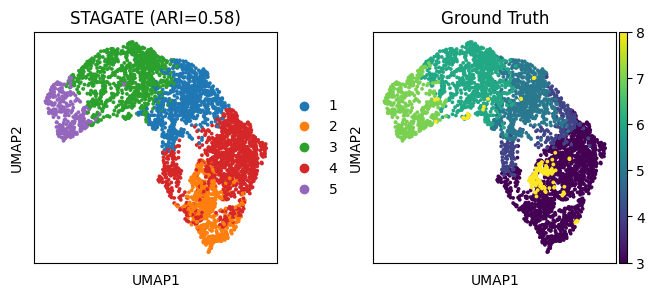

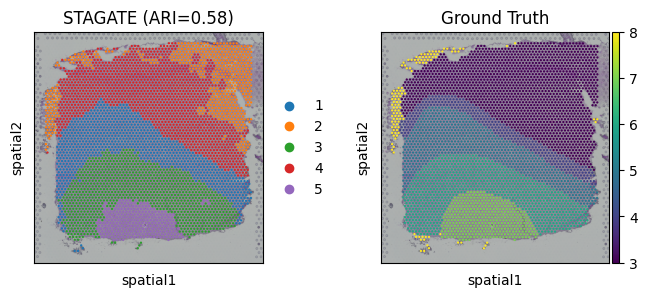

In [3]:
sample_list = ['151507','151508','151509','151510','151669','151670','151671','151672','151673','151674','151675','151676']
n_clusters = [7,7,7,7,5,5,5,5,7,7,7,7]
for i in range(8，len(sample_list)):
    section_id = sample_list[i]
    print(section_id)
    input_dir = os.path.join('G:/dataset/1_DLPFC/dataset', section_id)
    adata = sc.read_visium(path=input_dir, count_file='filtered_feature_bc_matrix.h5')
    adata.var_names_make_unique()

    #Normalization
    sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)

    # read the annotation
    Ann_df = pd.read_csv(os.path.join('G:/dataset/1_DLPFC/groundtruth', section_id+'_groundtruth.csv'), sep=',')
    Ann_df = Ann_df.drop(['Unnamed: 0', 'id'], axis=1)
    Ann_df.set_index('cell8me', inplace = True)
    Ann_df.columns = ['Ground Truth']

    adata.obs['Ground Truth'] = Ann_df.loc[adata.obs_names, 'Ground Truth']

    plt.rcParams["figure.figsize"] = (3, 3)
    sc.pl.spatial(adata, img_key="hires", color=["Ground Truth"], show = False)
    plt.savefig("./{}_spatial1.png".format(section_id), dpi = 500)

    STAGATE.Cal_Spatial_Net(adata, rad_cutoff=150)
    STAGATE.Stats_Spatial_Net(adata)


    import tensorflow as tf
    tf.compat.v1.disable_eager_execution()
    import os
    os.environ['CUDA_VISIBLE_DEVICES'] = "0"

    adata = STAGATE.train_STAGATE(adata, alpha=0)

    sc.pp.neighbors(adata, use_rep='STAGATE')
    sc.tl.umap(adata)
    adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=n_clusters[i])

    obs_df = adata.obs.dropna()
    ARI = adjusted_rand_score(obs_df['mclust'], obs_df['Ground Truth'])
    print('Adjusted rand index = %.2f' %ARI)

    plt.rcParams["figure.figsize"] = (3, 3)
    sc.pl.umap(adata, color=["mclust", "Ground Truth"], title=['STAGATE (ARI=%.2f)'%ARI, "Ground Truth"], show = False)
    plt.savefig("./{}_umap.png".format(section_id).format(section_id), dpi = 500)

    plt.rcParams["figure.figsize"] = (3, 3)
    sc.pl.spatial(adata, color=["mclust", "Ground Truth"], title=['STAGATE (ARI=%.2f)'%ARI, "Ground Truth"], show = False)
    plt.savefig("./{}_spatial2.png".format(section_id), dpi = 500)

    adata.filename = './{}.h5ad'.format(section_id)
    print(adata.isbacked)
